# 1. 이해하기

## 1.1 Agent vs Tool

**AI Agent(에이전트)**는 자율적으로 특정 목표를 달성하기 위해 설계된 독립적인 실행 단위입니다. 단순히 명령을 따르는 소프트웨어를 넘어 환경을 인식하고 스스로 의사결정을 내릴 수 있는 시스템이며, 사람의 개입 없이도 주어진 목표를 이해하고, 여러 단계를 거치며 계획과 결정을 스스로 내린 뒤 작업을 완료할 수 있습니다. AI 에이전트의 핵심 요소로는 **모델(Model), 도구(Tools), 오케스트레이션(Orchestration)** 세 가지가 있으며, 모델, 특히 LLM(대규모 언어 모델)이 에이전트의 두뇌 역할을 하며 의사결정과 행동 계획에 핵심적인 역할을 합니다. ADK에서 `BaseAgent` 클래스는 모든 에이전트의 기본 설계도 역할을 하며, `LlmAgent`는 LLM의 능력을 활용하여 추론, 자연어 이해, 의사결정, 응답 생성, 도구 상호작용 등을 수행하는 핵심 컴포넌트입니다. 에이전트는 주어진 상황을 인지하고 스스로 판단을 내리기 위해 추론 능력이 중요하며, 이를 위해 OpenAI의 GPT-4o 또는 Claude-3.5-sonnet과 같은 최첨단 LLM의 적용이 필수적일 수 있습니다.

반면에 **Tool(도구)**은 AI 에이전트에게 제공되는 특정 **기능 또는 능력**을 나타냅니다. 도구는 에이전트가 핵심 텍스트 생성 및 추론 능력을 넘어 실제 작업을 수행하고 외부 세계와 상호작용할 수 있도록 합니다. 효과적인 도구 사용은 유능한 에이전트를 단순한 언어 모델과 구별하는 요소입니다. 기술적으로 도구는 일반적으로 **Python 함수, 클래스 메서드** 또는 심지어 다른 전문 에이전트와 같은 **모듈화된 코드 컴포넌트**로, 명확하고 미리 정의된 작업을 실행하도록 설계되었습니다. 이러한 작업은 종종 외부 시스템이나 데이터와의 상호작용을 포함합니다.

##1.2 Tool과 Agent의 주요 차이점

*   **자율성 및 의사결정:** 에이전트는 환경을 인식하고 스스로 판단과 결정을 내리는 자율적인 시스템입니다. 도구는 에이전트가 사용하는 수단이며, 도구 자체는 독립적인 의사결정 능력을 가지지 않습니다. 소스에서는 에이전트가 어떤 도구를 호출할지 결정하고, 질문을 명확히 하며, 정교한 문제 해결에 참여할 수 있다고 명시하며, 이는 단순한 입출력 동작을 하는 일반적인 도구의 능력을 훨씬 넘어선다고 설명합니다. 만약 어떤 에이전트의 기능이 명확한 입력/출력을 가진 단일 작업으로 제한되고 인공지능(AI) 없이 규칙 기반으로만 동작한다면 도구로 볼 수도 있지만, 컨텍스트, 메모리, 다중 턴 대화, 자율적인 의사결정을 포함하게 되면 더 이상 단순한 도구가 아닌 에이전트로 간주됩니다.
*   **역할:** 에이전트는 대화 흐름을 관리하고, 사용자, LLM, 도구를 연결하는 핵심 컴포넌트입니다. 도구는 에이전트에게 특정 기능을 추가하여 에이전트가 작업을 수행할 수 있도록 돕는 확장 기능입니다. 에이전트의 LLM은 자신의 지침(`instruction`)과 사용 가능한 도구의 `description` 등을 바탕으로 **언제, 어떻게** 도구를 사용할지 추론하고 결정합니다.
*   **구현 및 관계:** ADK에서 에이전트는 `BaseAgent`나 `LlmAgent` 클래스의 인스턴스로 정의됩니다. 도구는 Python 함수, 내장 도구, 또는 `LangchainTool`이나 `CrewaiTool`처럼 서드파티 라이브러리의 기능을 래핑한 형태일 수 있습니다. 또한, ADK와 OpenAI SDK 모두에서 **Agent-as-a-Tool**이라는 개념을 지원합니다. 이는 **다른 에이전트를 래핑하여 도구처럼 사용하는 것**으로, 호출하는 에이전트(`Parent Agent`)가 제어권을 유지하고 호출받은 에이전트(`AgentTool`로 사용된 에이전트)의 결과를 받아 사용자에게 응답을 생성합니다. 이는 사용자 응답 책임이 호출받은 에이전트로 완전히 넘어가는 **Sub-agent** 방식과는 다릅니다. 따라서 에이전트가 도구로 사용될 수는 있지만, 기본적으로 도구는 에이전트의 하위 개념으로서 에이전트가 작업을 수행하는 데 필요한 특정 기능이나 능력을 의미합니다.


## 1.3 결론

 **Agent**는 자율적인 사고 및 의사결정 능력을 가진 시스템의 핵심 단위이며, **Tool**은 이러한 에이전트가 외부 세계와 상호작용하거나 특정 작업을 수행하기 위해 사용하는 기능 또는 능력의 모음입니다. 에이전트는 도구를 사용하며, 특정 경우에는 다른 에이전트를 도구처럼 사용할 수도 있습니다 (Agent-as-a-Tool).

## 1.4 다양한 tool 연동

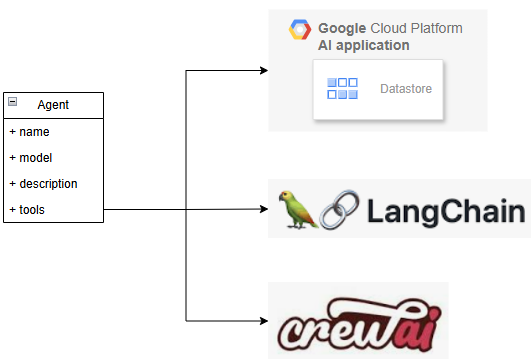

# 2. 구현



```
pip install langchain-community crewai-tools wikipedia
```



## 2.1 vertexai search tool agent

### 2.1.1 Data Store 만들기

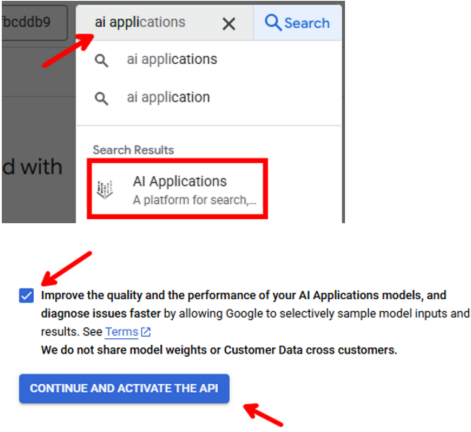

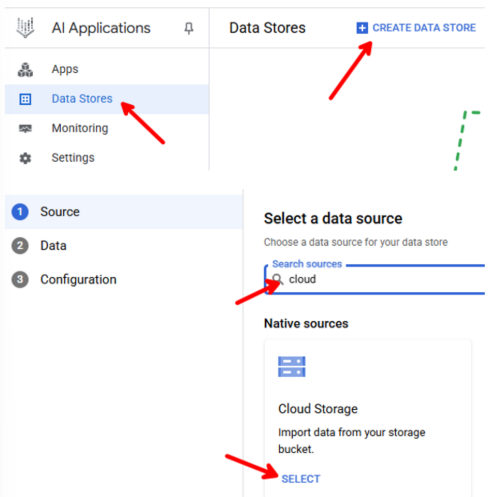

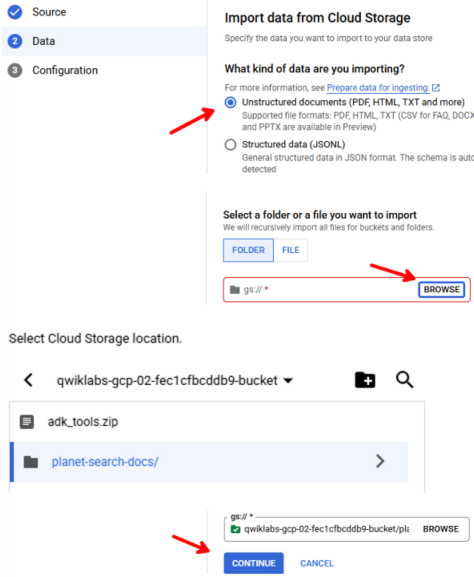

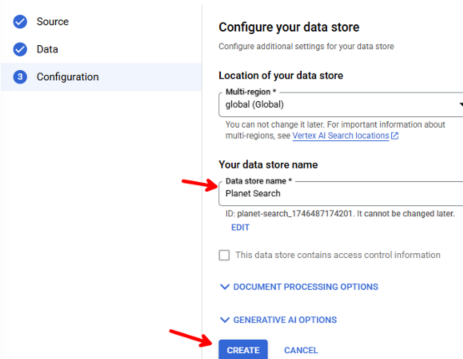

### 2.1.2 Code 이해 및 수정



```
from google.adk import Agent
from google.adk.tools import VertexAiSearchTool

vertexai_search_tool = VertexAiSearchTool(
   data_store_id="""
   projects/YOUR_PROJECT_ID/
   locations/global/
   collections/default_collection/
   dataStores/YOUR_DATA_STORE_ID
   """
)

root_agent = Agent(
   name="vertexai_search_agent",
   model="gemini-2.0-flash-001",
   description="Answer questions using your data store access.",
   instruction="You analyze new planet discoveries and engage with the scientific community on them.",
   tools=[vertexai_search_tool]
)

```



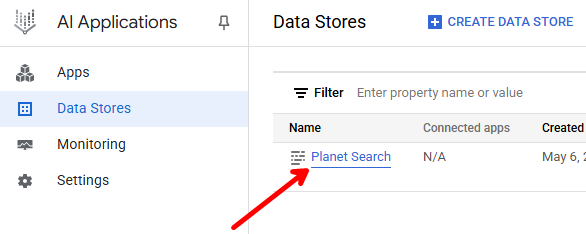

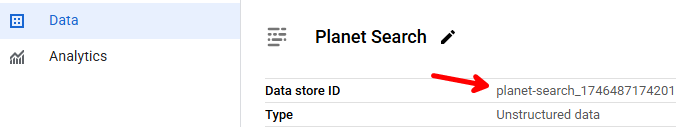



```
vertexai_search_tool = VertexAiSearchTool(
   data_store_id=
      "projects/qwiklabs-gcp-02-fec1cfbcddb9"
      "/locations/global"
      "/collections/default_collection"
      "/dataStores/planet-search_1746487174201"
)
```



### 2.1.3 환경변수 설정



```
GOOGLE_GENAI_USE_VERTEXAI=TRUE
GOOGLE_CLOUD_PROJECT=YOUR_PROJECT_ID_HERE
GOOGLE_CLOUD_LOCATION=us-central1
```



### 2.1.4 Data Store 생성 확인

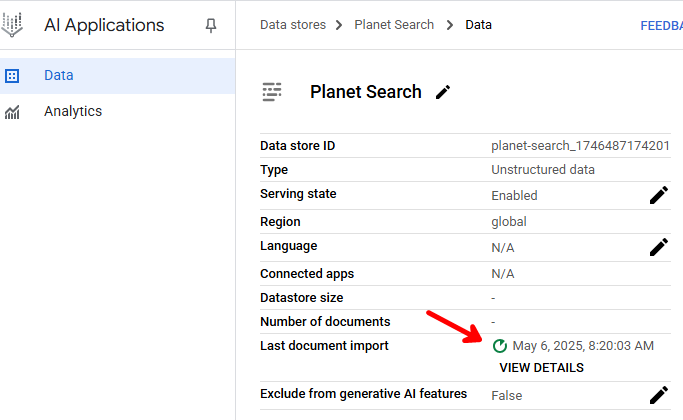

### 2.1.5 실행 및 결과 확인



```
adk run vertexai_search_tool_agent
```



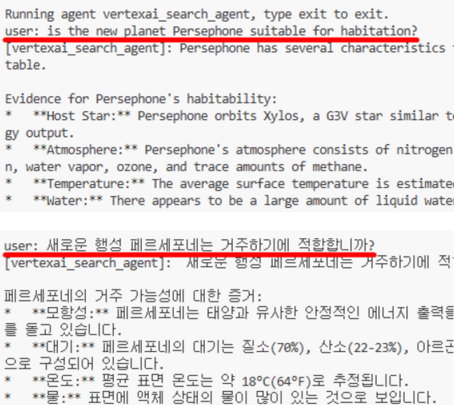

## 2.2 Third-party tools

### 2.2.1 Langchain



```
import os
from dotenv import load_dotenv

from google.adk import Agent
from google.adk.tools.langchain_tool import LangchainTool # import

from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

load_dotenv()
model_name = os.getenv("MODEL")

root_agent = Agent(
    name="lanchgain_tool_agent",
    model=model_name,
    description="Agent to answer questions using Wikipedia.",
    instruction="I can answer your questions by searching Wikipedia! Ask me about a historical figure.",

    tools = [
        LangchainTool(
            tool=WikipediaQueryRun(
              api_wrapper=WikipediaAPIWrapper()
            )
        )
    ]
)
```



### 2.2.2 crewai



```
import os
from dotenv import load_dotenv

from google.adk import Agent
from google.adk.tools.crewai_tool import CrewaiTool

from crewai_tools import FileWriterTool

load_dotenv()
model_name = os.getenv("MODEL")

root_agent = Agent(
    name="crewai_tool_agent",
    model=model_name,
    description="Agent to write files.",
    instruction="I can write a file if you ask me to keep a note.",
    tools = [CrewaiTool(
        name="file_writer_tool",
        description=(
            "Writes a file to disk when run with a"
            "filename, content, overwrite set to 'true',"
            "and an optional directory"
        ),
        tool=FileWriterTool()
    )]
)
```



### 2.2.3 실행 및 결과 확인



```
adk web
```



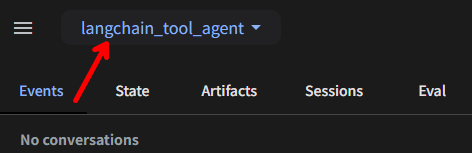

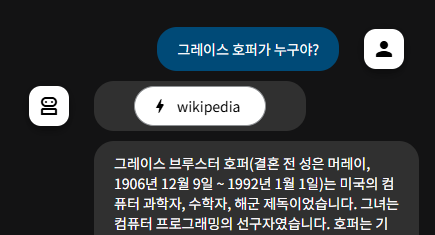

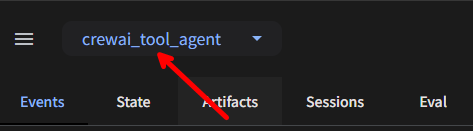

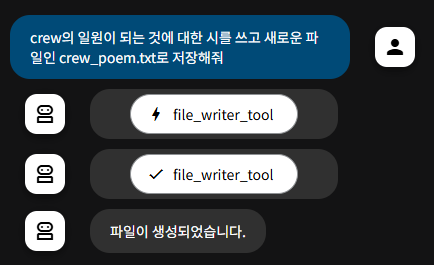

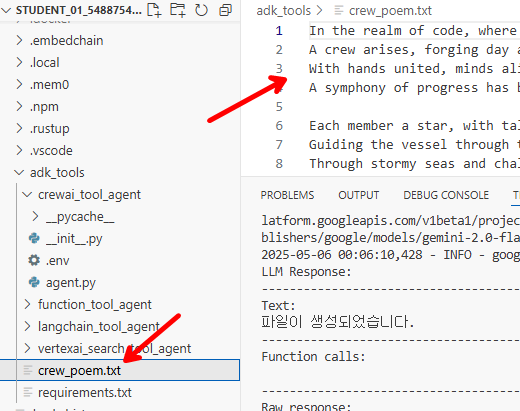

## 2.4 tool 합치기

### 2.4.1 custom tool + crewai



```
import os
from dotenv import load_dotenv
import yfinance as yf

from google.adk import Agent

from google.adk.tools.crewai_tool import CrewaiTool

from crewai_tools import FileWriterTool

load_dotenv()
model_name = os.getenv("MODEL")

crewai_tool = CrewaiTool(
        name="file_writer_tool",
        description=(
            """
            파일 이름, 콘텐츠, 'true'로 설정된 덮어쓰기 및
            선택적 디렉터리를 사용하여 실행하면 디스크에 파일을 씁니다.
            """
        ),
        tool=FileWriterTool()
    )

def get_stock_price(symbol: str):
    """
    특정 기호의 현재 주가를 검색합니다.

    Args:
        symbol (str): 주식의 기호 (e.g., "AAPL", "GOOG").

    Returns:
        float: 현재 주가 또는 오류가 발생하는 경우 None입니다.
    """
    try:
        stock = yf.Ticker(symbol)
        historical_data = stock.history(period="1d")
        if not historical_data.empty:
            current_price = historical_data["Close"].iloc[-1]
            return {"current_price": current_price}
        else:
            return {"status": "error",
                    "error_message": "could not find data"}
    except Exception as e:
        print(f"Error retrieving stock price for {symbol}: {e}")
        return {"status": "error",
                "error_message": f"Error retrieving stock price for {symbol}: {e}"}


root_agent = Agent(
    name="function_tool_agent",
    model=model_name,
    description="당신은 주식 가격을 찾을 수 있고 시도 쓸 수 있는 agent입니다.",
    instruction="""
    특정 종목코드의 주가에 대한 질문에 답변해 드릴 수 있습니다.
    당신의 질문을 시로 표현하고 저장할 수 있어요    
    """,
    # Add the function tool below
    tools=[
      get_stock_price,
      crewai_tool
    ]

)
```



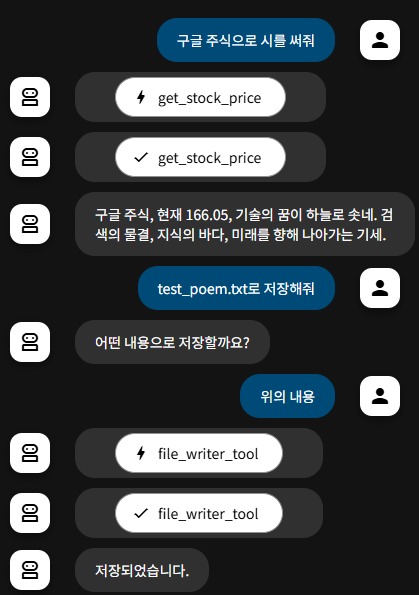

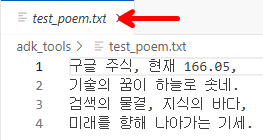

### 2.4.2 langchain + vertexai



```
# Langchain
LangchainTool(
    tool=WikipediaQueryRun(
      api_wrapper=WikipediaAPIWrapper()
    )
)

# vertexai
vertexai_search_tool = VertexAiSearchTool(
   data_store_id="""
   projects/YOUR_PROJECT_ID/
   locations/global/
   collections/default_collection/
   dataStores/YOUR_DATA_STORE_ID
   """
)
```



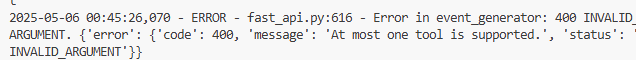